In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
sns.set()

In [29]:
data_train = pd.read_csv('Clean_Dataset.csv')

In [30]:
pd.set_option('display.max_columns', None)
data_train.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [32]:
data_train.dropna(inplace=True)

In [33]:
data_train.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [34]:
data_train.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [35]:
data_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [36]:
data_train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [37]:
data_train.drop(['flight'], axis=1, inplace=True)

In [38]:
data_train.rename(columns={'class': 'flight_class'}, inplace=True)

In [39]:
data_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


em cima estive a limpar algumas colunas que não ia precisar

# Feature Engineering

## OneHot Encoder, Label encoder
para dar handle das colunas categóricas, usei estes dois tipos de encoding, em que o one hot encoder serve para dados que não estão em nenhuma ordem e o label encoder para dados que seguem uma ordem

In [40]:
data_train['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

gráfico que representa qual ou quais as companhias aéreas mais caras

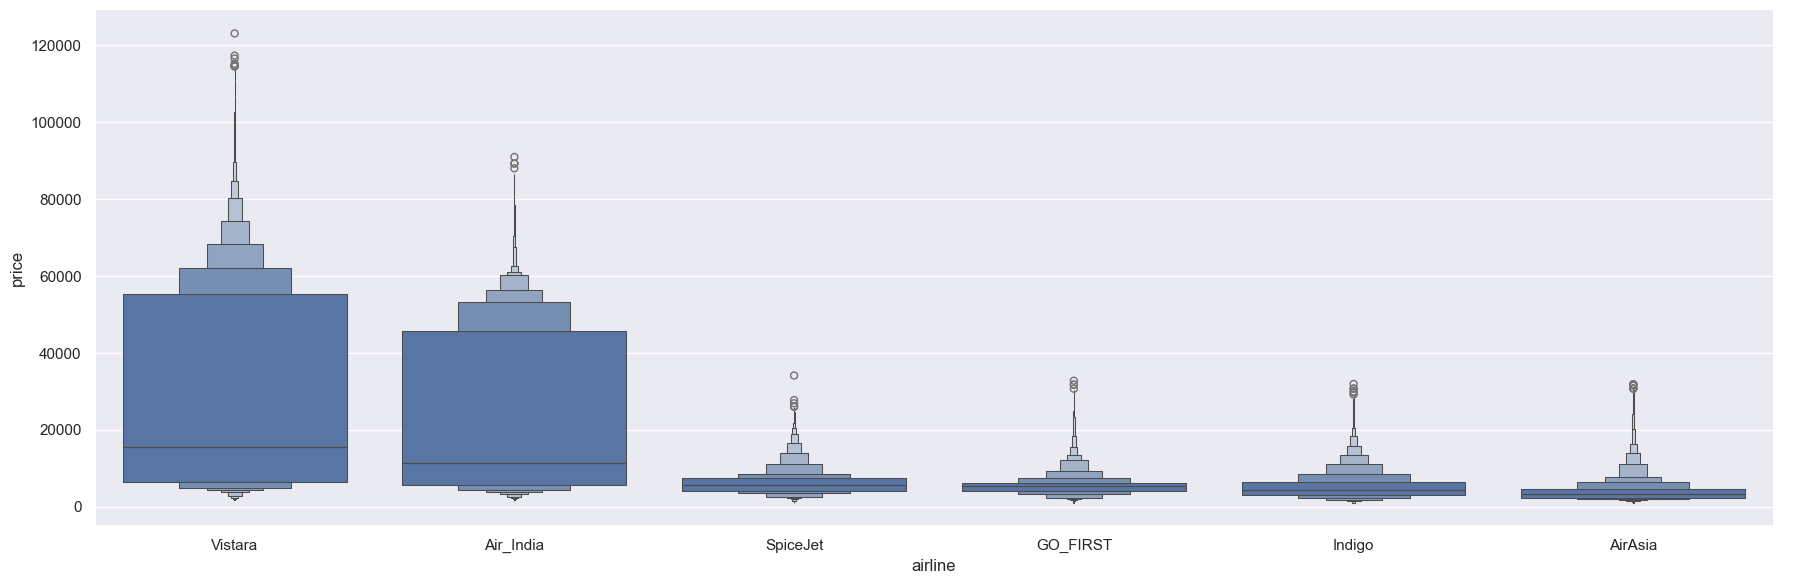

In [41]:
sns.catplot(y='price', x='airline', data=data_train.sort_values('price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [42]:
## como as companhias aéreas têm preços diferentes, vamos transformar essa variável categórica em uma variável numérica
airline = data_train[['airline']]
airline = pd.get_dummies(airline, drop_first=True).astype(int)
airline.head()

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [43]:
data_train['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

cidade de origem vs preço

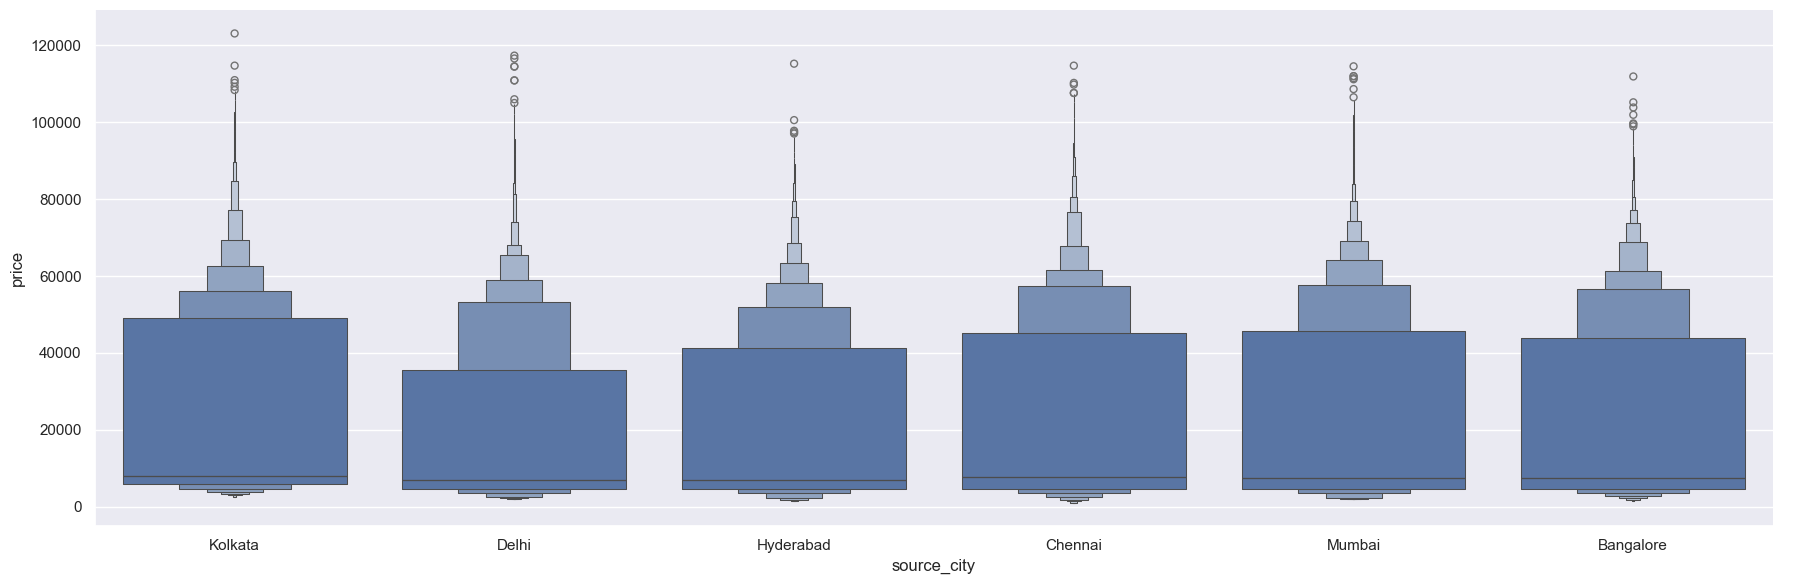

In [44]:
sns.catplot(y='price', x='source_city', data=data_train.sort_values('price', ascending=False), kind='boxen', height=6, aspect=3)

In [45]:
## como as cidades de origem têm preços diferentes, vamos transformar essa variável categórica em uma variável numérica
source_city = data_train[['source_city']]
source_city = pd.get_dummies(source_city, drop_first=True).astype(int)
source_city.head()

,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


destino vs preço

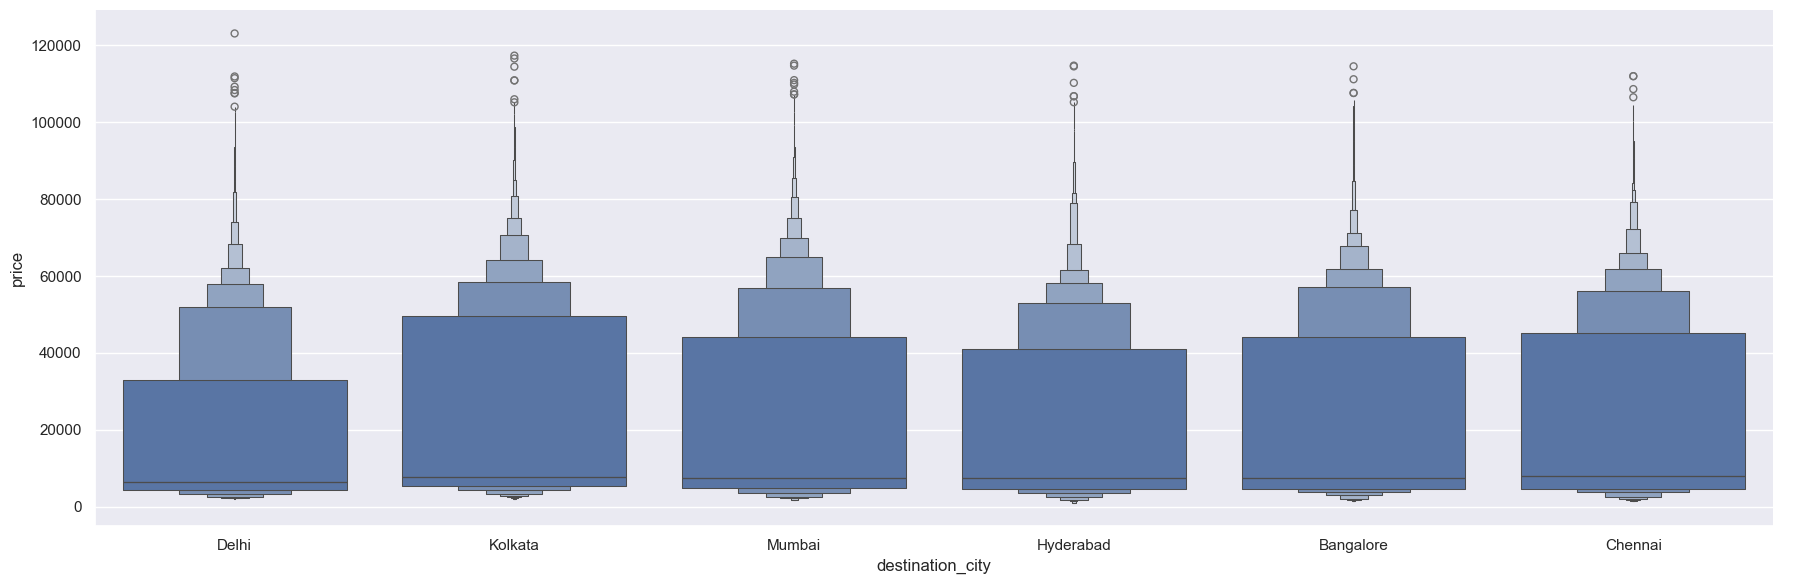

In [46]:
sns.catplot(y='price', x='destination_city', data=data_train.sort_values('price', ascending=False), kind='boxen', height=6, aspect=3)

In [47]:
destination_city = data_train[['destination_city']] 
destination_city = pd.get_dummies(destination_city, drop_first=True).astype(int)
destination_city.head()

,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [48]:
data_train['flight_class'].value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

In [49]:
data_train['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [50]:
data_train.replace({'zero': 0, 'one': 1, 'two_or_more': 2}, inplace=True)

C:\Users\phrea\AppData\Local\Temp\ipykernel_17424\95894189.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.replace({'zero': 0, 'one': 1, 'two_or_more': 2}, inplace=True)


In [51]:
data_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [52]:
data_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585


In [53]:
data_train['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

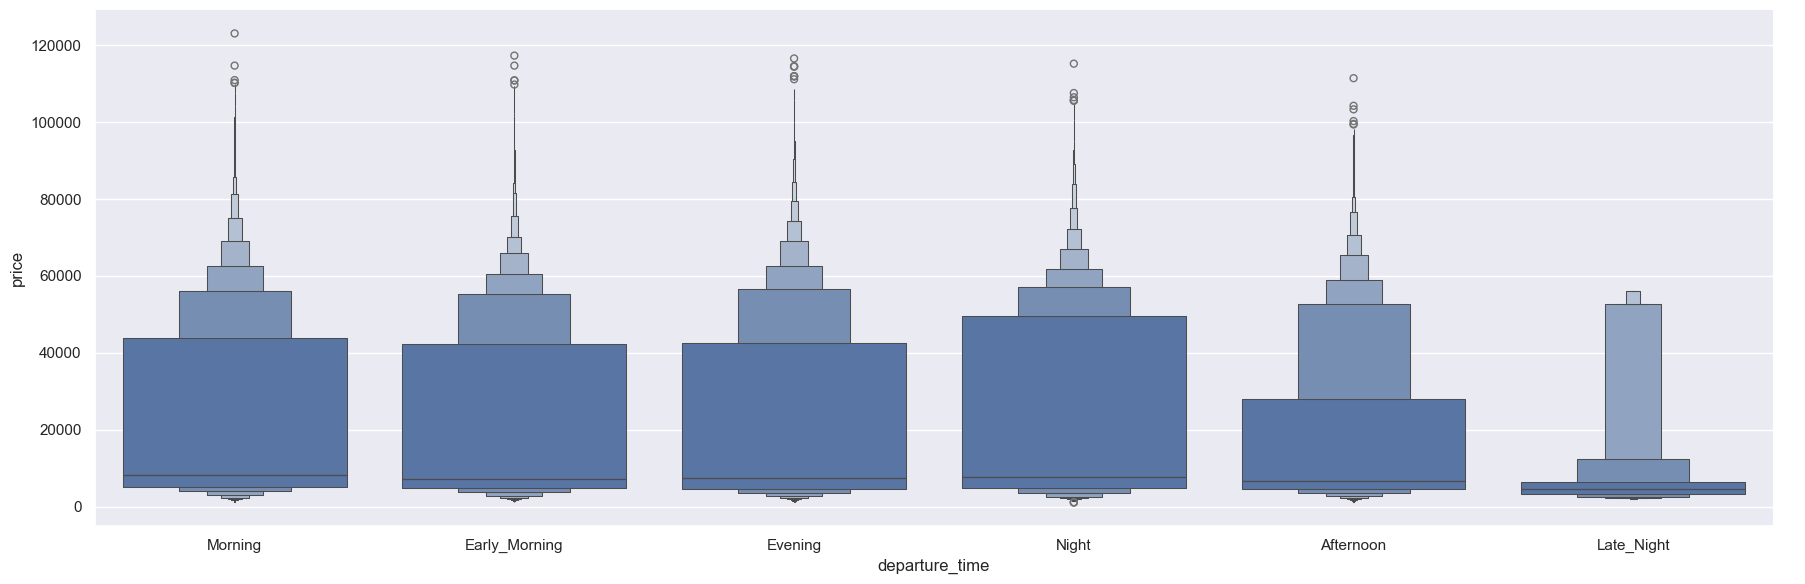

In [54]:
sns.catplot(y='price', x='departure_time', data=data_train.sort_values('price', ascending=False), kind='boxen', height=6, aspect=3)

In [55]:
## como os horários de partida têm preços diferentes, vamos transformar essa variável categórica em uma variável numérica
departure_time = data_train[['departure_time']]
departure_time = pd.get_dummies(departure_time, drop_first=True).astype(int)
departure_time.head()

,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [56]:
data_train['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

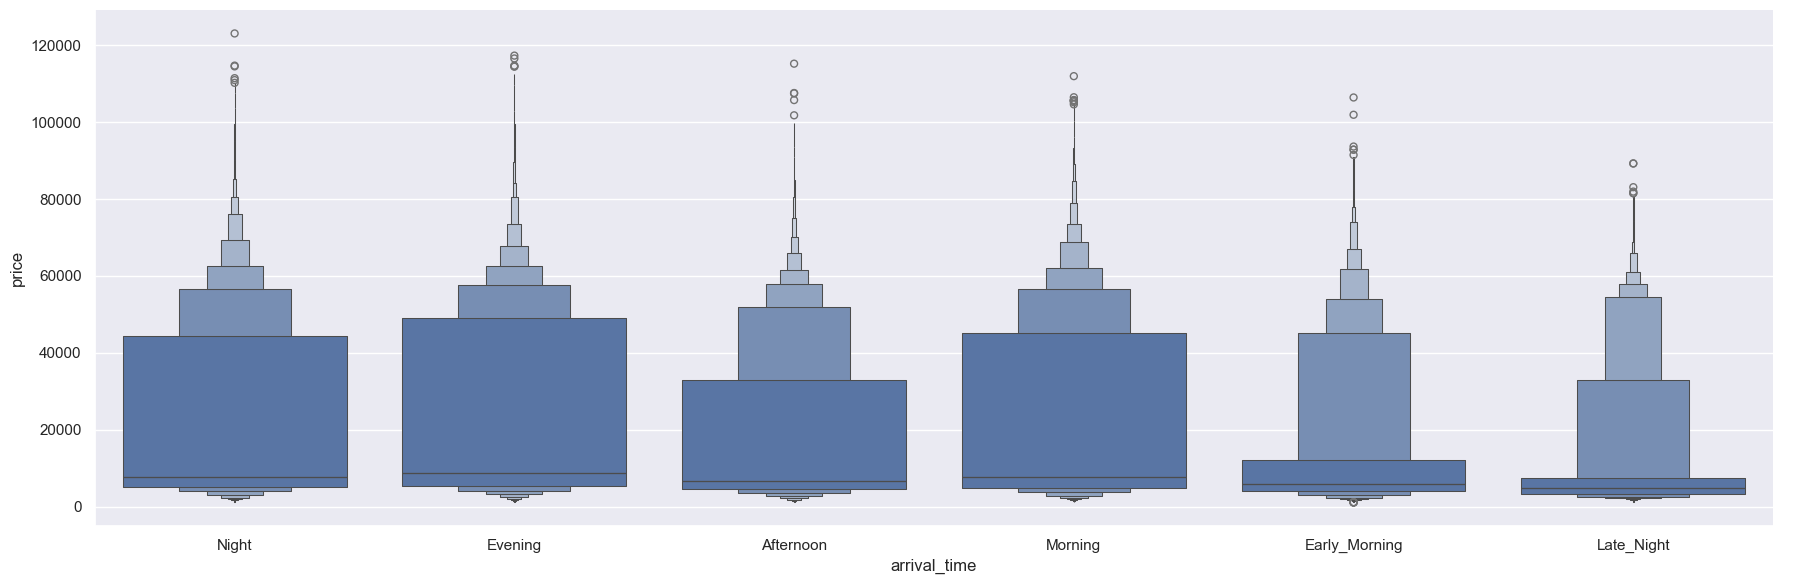

In [57]:
sns.catplot(y='price', x='arrival_time', data=data_train.sort_values('price', ascending=False), kind='boxen', height=6, aspect=3)

In [58]:
## como os horários de chegada têm preços diferentes, vamos transformar essa variável categórica em uma variável numérica

arrival_time = data_train[['arrival_time']]
arrival_time = pd.get_dummies(arrival_time, drop_first=True).astype(int)
arrival_time.head()

,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [59]:
data_train['flight_class'].value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

In [60]:
## como as classes de voo têm preços diferentes, vamos transformar essa variável categórica em uma variável numérica
flight_class = data_train[['flight_class']]
flight_class = pd.get_dummies(flight_class, drop_first=True).astype(int)
flight_class.head()

,flight_class_Economy
0,1
1,1
2,1
3,1
4,1


In [61]:
flight_class

,flight_class_Economy
0,1
1,1
2,1
3,1
4,1
...,...
300148,0
300149,0
300150,0
300151,0


In [62]:
## vamos concatenar as variáveis numéricas com as variáveis categóricas
data_train = pd.concat([data_train, airline, source_city, destination_city, departure_time, arrival_time, flight_class], axis=1)

In [63]:
data_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,flight_class_Economy
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [64]:
## vamos dropar as variáveis categóricas
data_train.drop(['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'flight_class'], axis=1, inplace=True)

In [65]:
data_train.head()

,stops,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,flight_class_Economy
0,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
1,0,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
2,0,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,0,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


# Dataset de teste FE

In [66]:
data_test = pd.read_csv('Clean_Dataset_test.csv')

In [67]:
data_test.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [68]:
data_test.dropna(inplace = True)
print(data_test.isnull().sum())
data_test.rename(columns={'class': 'flight_class'}, inplace=True)


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64


In [69]:
drop_columns = ['Unnamed: 0', 'flight']
data_test.rename(columns={'class': 'flight_class'}, inplace=True)
data_test.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [70]:
data_test.drop(['Unnamed: 0'], axis=1, inplace=True)
data_test.drop(['flight'], axis=1, inplace=True)
data_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [71]:
airline = data_test[['airline']]
airline = pd.get_dummies(airline, drop_first=True).astype(int)
source_city = data_test[['source_city']]
source_city = pd.get_dummies(source_city, drop_first=True).astype(int)
destination_city = data_test[['destination_city']] 
destination_city = pd.get_dummies(destination_city, drop_first=True).astype(int)
data_test.replace({'zero': 0, 'one': 1, 'two_or_more': 2}, inplace=True)
departure_time = data_test[['departure_time']]
departure_time = pd.get_dummies(departure_time, drop_first=True).astype(int)
arrival_time = data_test[['arrival_time']]
arrival_time = pd.get_dummies(arrival_time, drop_first=True).astype(int)
flight_class = data_test[['flight_class']]
flight_class = pd.get_dummies(flight_class, drop_first=True).astype(int)
data_test = pd.concat([data_test, airline, source_city, destination_city, departure_time, arrival_time, flight_class], axis=1)
data_test.drop(['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'flight_class'], axis=1, inplace=True)
data_test.head()

C:\Users\phrea\AppData\Local\Temp\ipykernel_17424\3032436139.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.replace({'zero': 0, 'one': 1, 'two_or_more': 2}, inplace=True)


,stops,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,flight_class_Economy
0,0,2.17,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
1,0,2.33,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
2,0,2.17,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,0,2.25,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,2.33,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


# Feature selection
descobrir qual a feature que vai contribuir e ter melhor relação com a target var.
métodos usados 
- heatmap
- feature_importance_
- SelectKBest

In [72]:
data_train.shape

(300153, 30)

In [73]:
data_train.columns

Index(['stops', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'flight_class_Economy'],
      dtype='object')

In [74]:
X = data_train.loc[:, ['stops', 'duration', 'days_left', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'flight_class_Economy']]

In [75]:
X.head()

,stops,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,flight_class_Economy
0,0,2.17,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
1,0,2.33,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
2,0,2.17,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,0,2.25,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,2.33,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [76]:
y = data_train.iloc[:, 3]

In [77]:
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

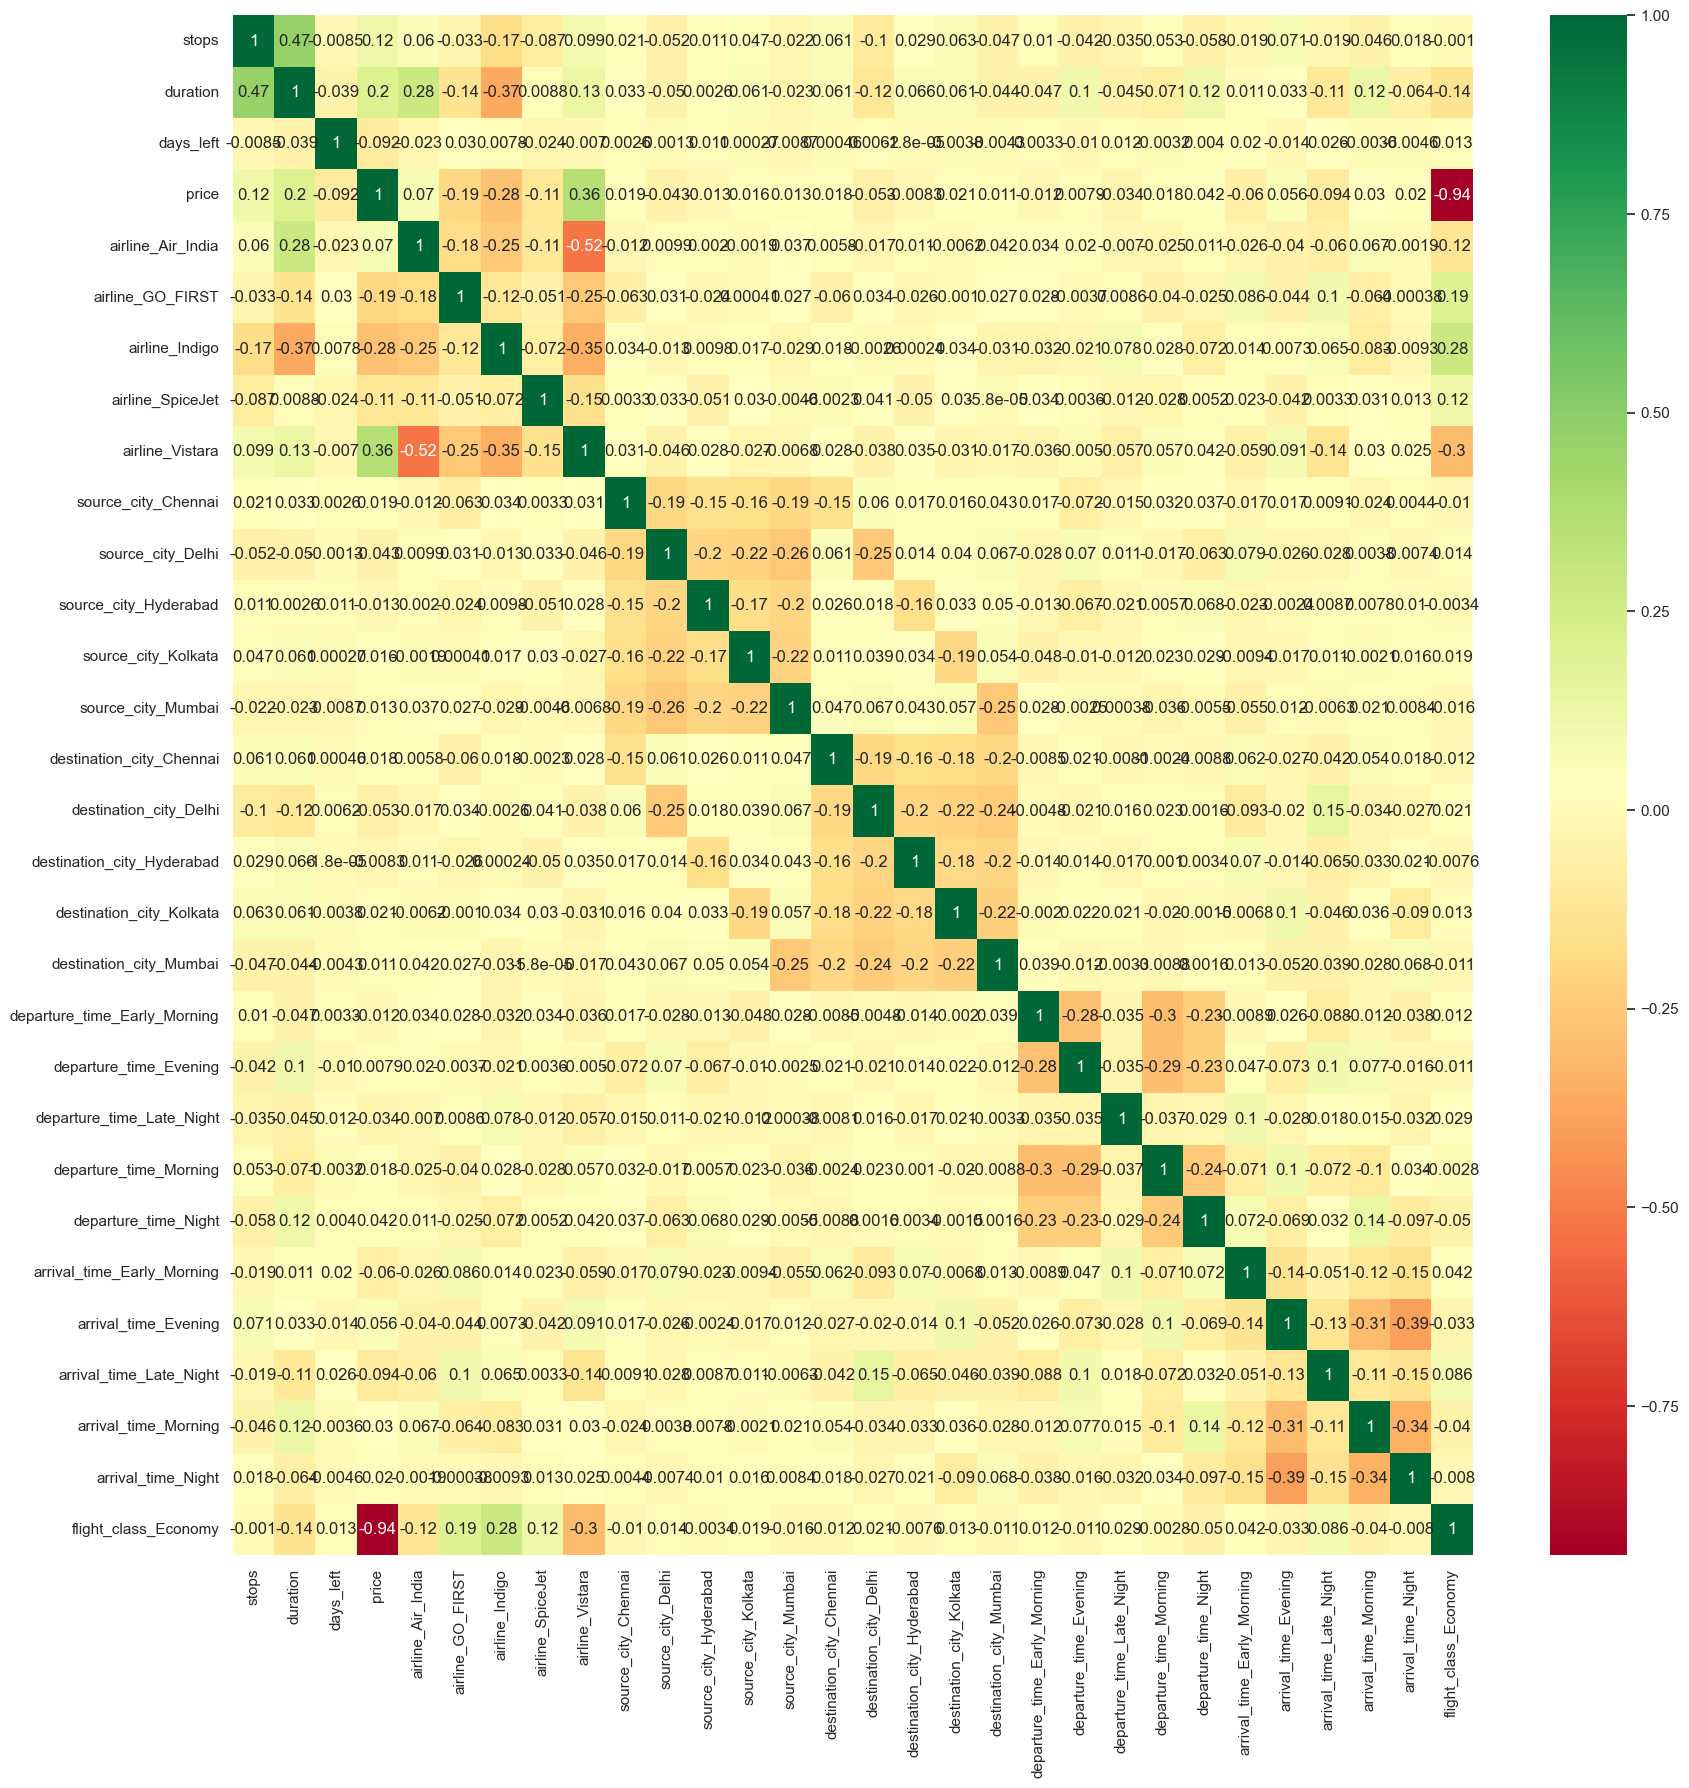

In [78]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

## extrair a feature mais importante usando o extra tree regressor

In [79]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [80]:
print(selection.feature_importances_)

[3.15711518e-02 2.50716562e-02 1.87157836e-02 5.84580962e-03
 1.80136218e-04 1.65391506e-04 1.38325289e-04 5.14277344e-03
 1.01956821e-03 4.33534331e-03 1.49518545e-03 2.03065469e-03
 2.36304543e-03 1.03914379e-03 4.09780003e-03 1.92569143e-03
 1.98985631e-03 2.02058609e-03 1.09056490e-03 1.47015827e-03
 5.37071312e-05 1.34323610e-03 9.86113491e-04 9.46045620e-04
 1.54522359e-03 2.23281663e-04 1.07991859e-03 1.74279140e-03
 8.80371057e-01]


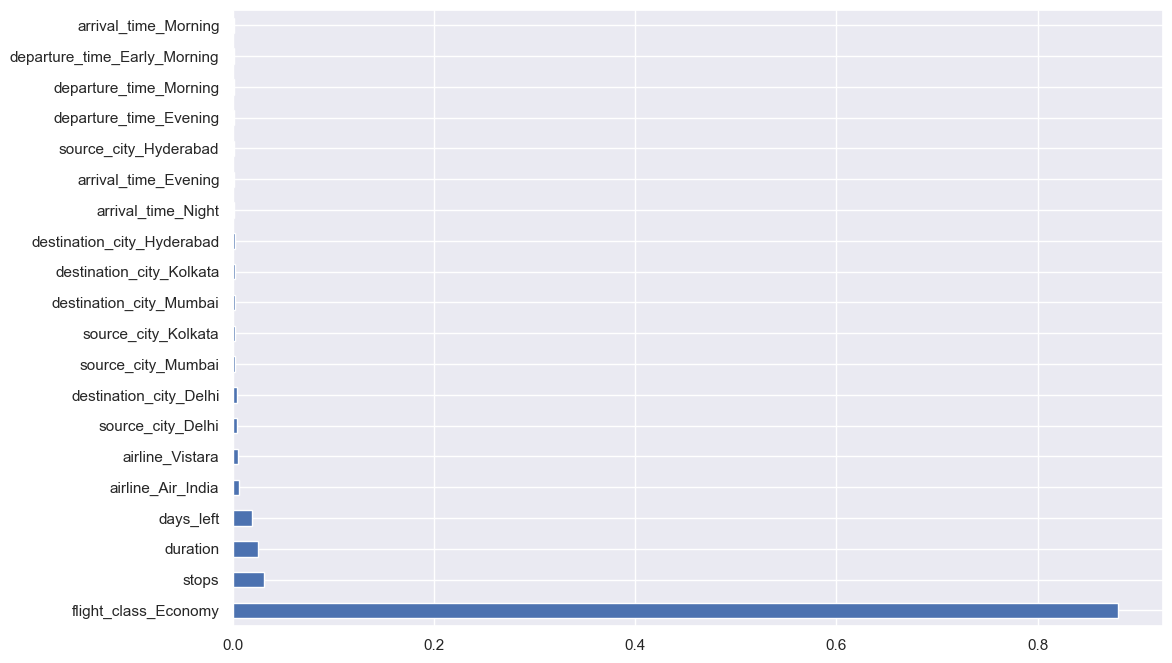

In [81]:
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## fit do modelo com RandomForest

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
y_pred = reg_rf.predict(X_test)

In [86]:
reg_rf.score(X_train, y_train)

0.9974959439233769

In [87]:
reg_rf.score(X_test, y_test)

0.9848672998628504

In [88]:
from sklearn.metrics import mean_squared_error


In [89]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 2792.9623470311744


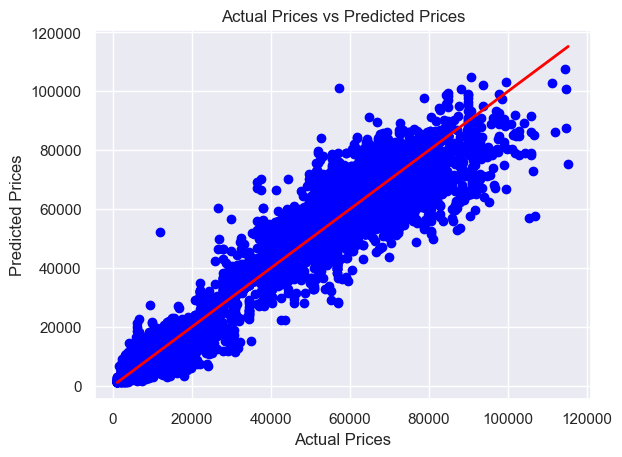

In [90]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [91]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1085.568888752229
MSE: 7800638.6719338875
RMSE: 2792.9623470311744


## teste do modelo com diferente config

In [92]:
## teste do modelo com configurações diferentes colocadas manualmente
reg_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    criterion='poisson',
    random_state=42
)

In [93]:
reg_rf.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [94]:
y_pred = reg_rf.predict(X_test)

In [95]:
reg_rf.score(X_train, y_train)

0.9921367894926001

In [96]:
reg_rf.score(X_test, y_test)

0.9846366218787718

In [97]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)
reg_rf.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
reg_rf.score(X_train, y_train)

0.9975059183858332

In [ ]:
reg_rf.score(X_test, y_test)

0.9847832441372957

In [ ]:
## teste do modelo com configurações diferentes colocadas manualmente
reg_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    criterion='friedman_mse',
    random_state=42
)

In [ ]:
reg_rf.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=20,
                      max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=300, random_state=42)

In [ ]:
y_pred = reg_rf.predict(X_test)


In [ ]:
reg_rf.score(X_train, y_train)


0.9826370833086399

In [ ]:
reg_rf.score(X_test, y_test)

0.9790643610176405

# MELHORES CONFIGS

In [ ]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.9974980216515004

In [ ]:
reg_rf.score(X_test, y_test)


0.9848270312717545

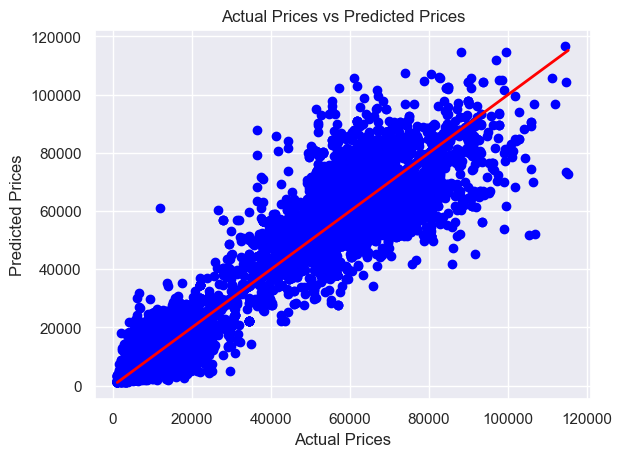

In [120]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

C:\Users\phrea\AppData\Local\Temp\ipykernel_17000\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


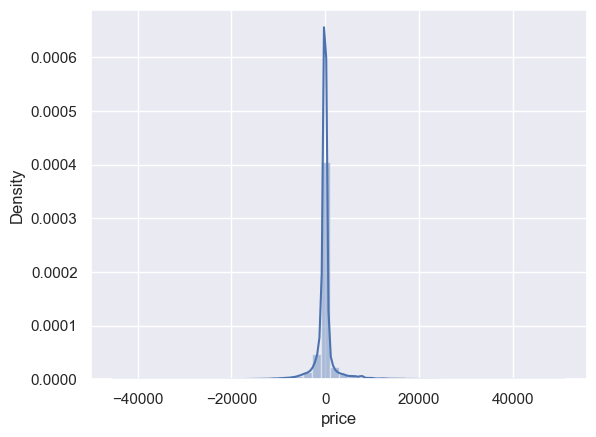

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1084.803816118815
MSE: 7821396.416825371
RMSE: 2796.6759584952583


In [ ]:
metrics.r2_score(y_test, y_pred)

0.9848270312717545

In [ ]:
import pickle

with open('gpt-RF.pkl', 'wb') as file:
    pickle.dump(reg_rf, file)

In [ ]:
import json 

accuracy = reg_rf.score(X_test, y_test)
average_model_error = metrics.mean_absolute_error(y_test, y_pred)
average_model_error_verbosed = metrics.mean_squared_error(y_test, y_pred)
average_magnitude_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))  
percentage_of_size_error = metrics.mean_absolute_percentage_error(y_test, y_pred)

metrics = {
    "accuracy": accuracy,
    "average_model_error": average_model_error,
    "average_model_error_verbosed": average_model_error_verbosed,
    "average_magnitude_error": average_magnitude_error,
    "percentage_of_size_error": percentage_of_size_error
}

with open('metrics.json', 'w') as file:
    json.dump(metrics, file)
     

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("scikit-learn version:", sklearn.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
scikit-learn version: 1.5.0
matplotlib version: 3.9.0


In [110]:
data_train.head()

,stops,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,flight_class_Economy
0,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
1,0,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
2,0,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,0,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [111]:
data_test.head()

,stops,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,flight_class_Economy
0,0,2.17,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
1,0,2.33,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
2,0,2.17,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,0,2.25,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,2.33,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


## Decision Tree

In [112]:
from sklearn.tree import DecisionTreeRegressor

### std config

In [113]:
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train, y_train)



DecisionTreeRegressor()

In [114]:
y_pred = model_decision_tree.predict(X_test)

In [116]:
model_decision_tree.score(X_train, y_train)

0.9992865963348827

In [117]:
model_decision_tree.score(X_test, y_test)

0.9758390602866192

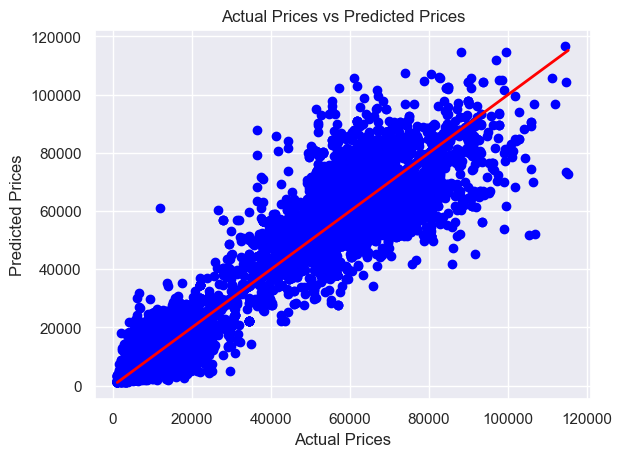

In [119]:
## scatter plot for the decision tree model

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### manual config 1

In [129]:
model_decision_tree = DecisionTreeRegressor(
    criterion='absolute_error',
    splitter='best',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0
    )

In [130]:
model_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5)

In [126]:
model_decision_tree.score(X_train, y_train)

0.9776879684212476

In [127]:
model_decision_tree.score(X_test, y_test)

0.9637641033514928

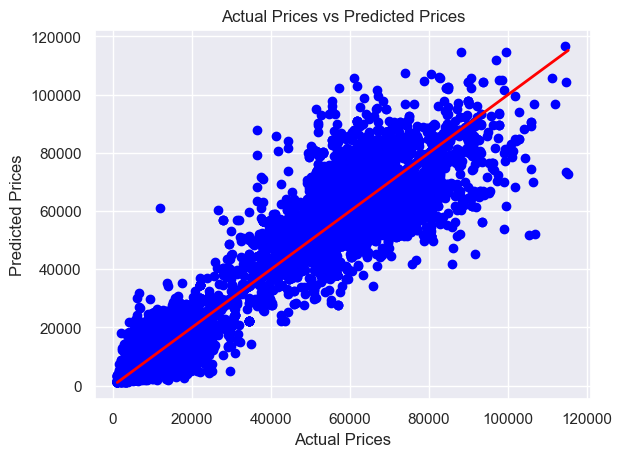

In [128]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

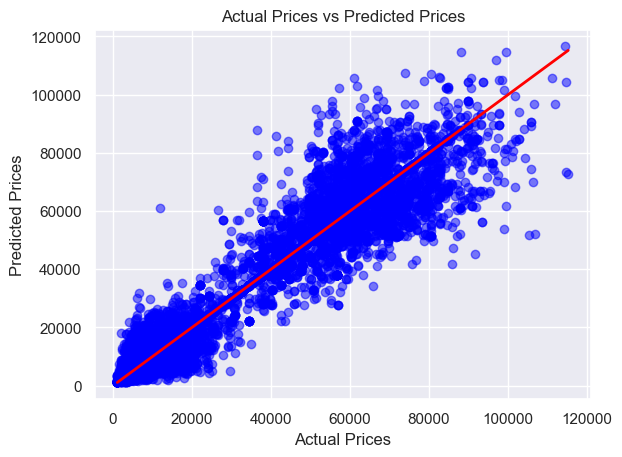

In [133]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


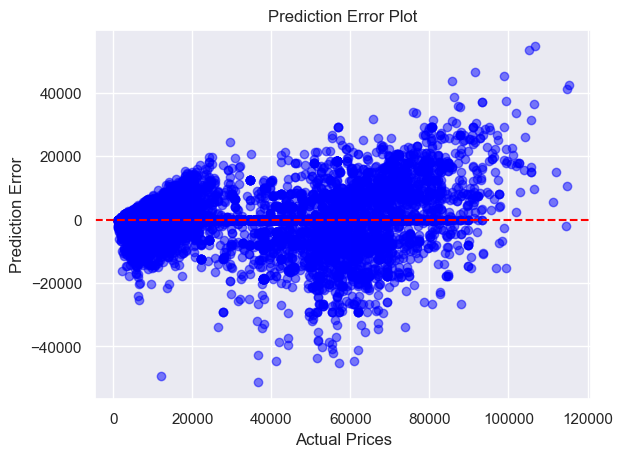

In [134]:
error = y_test - y_pred

plt.scatter(y_test, error, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Plot')
plt.show()


In [135]:
model_decision_tree = DecisionTreeRegressor(
    criterion='poisson',
    splitter='best',
    max_depth=None,
    min_samples_split=8,
    min_samples_leaf=4,
    min_weight_fraction_leaf=0.0,
    max_features='log2',
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0
    )

In [137]:
model_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_features='log2',
                      min_samples_leaf=4, min_samples_split=8)

In [139]:
y_pred = model_decision_tree.predict(X_test)

In [140]:
model_decision_tree.score(X_test, y_test)

0.9555479604981699

In [141]:
model_decision_tree.score(X_train, y_train)

0.9744019355277955

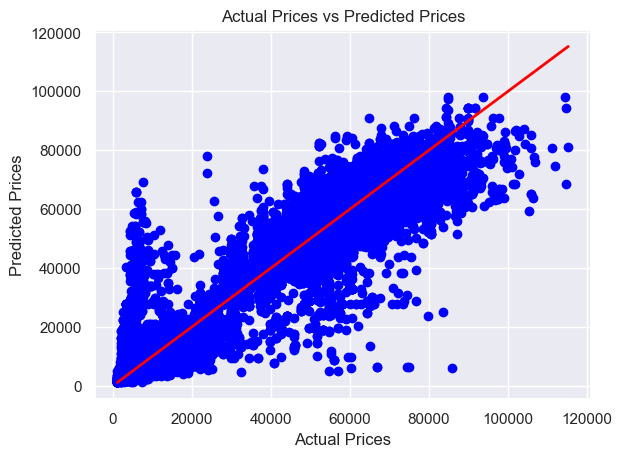

In [143]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [144]:
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train, y_train)


DecisionTreeRegressor()

In [145]:
y_pred = model_decision_tree.predict(X_test)

In [146]:
model_decision_tree.score(X_train, y_train)

0.9992865963348827

In [147]:
model_decision_tree.score(X_test, y_test)

0.9755130876392577

In [148]:
model_decision_tree.fit(X_test, y_test)

DecisionTreeRegressor()

In [149]:
model_decision_tree.score(X_test, y_test)

0.9997709427588855

In [150]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1183.73779103019
MSE: 12622569.256397158
RMSE: 3552.825531376


In [152]:
import json 

accuracy = model_decision_tree.score(X_test, y_test)
average_model_error = metrics.mean_absolute_error(y_test, y_pred)
average_model_error_verbosed = metrics.mean_squared_error(y_test, y_pred)
average_magnitude_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))  
percentage_of_size_error = metrics.mean_absolute_percentage_error(y_test, y_pred)

metrics = {
    "accuracy": accuracy,
    "average_model_error": average_model_error,
    "average_model_error_verbosed": average_model_error_verbosed,
    "average_magnitude_error": average_magnitude_error,
    "percentage_of_size_error": percentage_of_size_error
}

with open('metrics_gpt-DT.json', 'w') as file:
    json.dump(metrics, file)

In [153]:
import pickle

with open('gpt-DT.pkl', 'wb') as file:
    pickle.dump(model_decision_tree, file)
    
    

# Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression

model_linear_regression = LinearRegression()

model_linear_regression.fit(X_train, y_train)

LinearRegression()

In [156]:
model_linear_regression.score(X_train, y_train)

0.9099981746186754

In [157]:
model_linear_regression.score(X_test, y_test)

0.9099031138535915

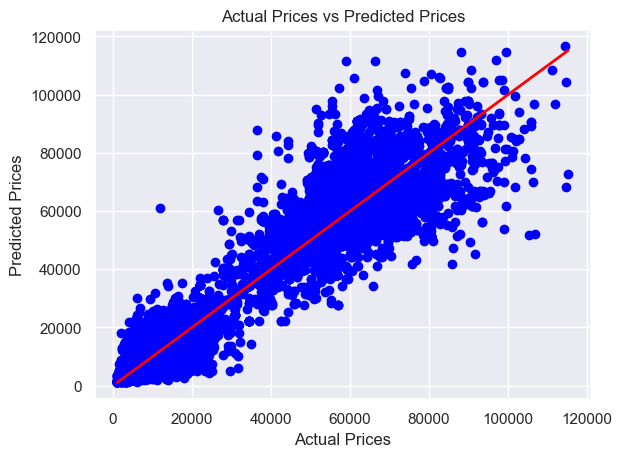

In [159]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [188]:
## import lasso regression

from sklearn.linear_model import Lasso

model_lasso = Lasso()

model_lasso.fit(X_train, y_train)

Lasso()

In [191]:
y_pred = model_lasso.predict(X_test)

In [189]:
model_lasso.score(X_train, y_train)

0.9099955650756448

In [190]:
model_lasso.score(X_test, y_test)

0.9098973637304034

In [194]:
import sklearn.metrics as metrics
y_pred = model_lasso.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4499.108631860645
MSE: 46446311.79880081
RMSE: 6815.15310164055


In [195]:
import pickle

with open('gpt-Lasso.pkl', 'wb') as file:
    pickle.dump(model_lasso, file)
    
import json

accuracy = model_lasso.score(X_test, y_test)
average_model_error = metrics.mean_absolute_error(y_test, y_pred)
average_model_error_verbosed = metrics.mean_squared_error(y_test, y_pred)
average_magnitude_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

metrics = {
    "accuracy": accuracy,
    "average_model_error": average_model_error,
    "average_model_error_verbosed": average_model_error_verbosed,
    "average_magnitude_error": average_magnitude_error
}

with open('metrics_gpt-Lasso.json', 'w') as file:
    json.dump(metrics, file)

In [185]:
model_lasso = Lasso(
    alpha=1.0,
    fit_intercept=True,
    precompute=False,
    copy_X=True,
    max_iter=5000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic'
)
model_lasso.fit(X_train, y_train)

Lasso(max_iter=5000)

In [186]:
model_lasso.score(X_train, y_train)

0.9099955650756448

In [187]:
model_lasso.score(X_test, y_test)

0.9098973637304034

In [165]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()

model_ridge.fit(X_train, y_train)

Ridge()

In [166]:
model_ridge.score(X_train, y_train)

0.9099981740955667

In [167]:
model_ridge.score(X_test, y_test)

0.9099031361148777

In [197]:
model_ridge = Ridge(
    alpha=1.0,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='svd',
    random_state=None
)

In [199]:
model_ridge.fit(X_train, y_train)

Ridge(solver='svd', tol=0.001)

In [200]:
y_pred = model_ridge.predict(X_test)

In [201]:
model_ridge.score(X_train, y_train)

0.9099981740955667

In [202]:
model_ridge.score(X_test, y_test)

0.9099031361148779

In [203]:
## import metrics from sklearn

import sklearn.metrics as metrics

y_pred = model_ridge.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import pickle

with open('gpt-Ridge.pkl', 'wb') as file:
    pickle.dump(model_ridge, file)
    
import json

accuracy = model_ridge.score(X_test, y_test)
average_model_error = metrics.mean_absolute_error(y_test, y_pred)
average_model_error_verbosed = metrics.mean_squared_error(y_test, y_pred)
average_magnitude_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

metrics = {
    "accuracy": accuracy,
    "average_model_error": average_model_error,
    "average_model_error_verbosed": average_model_error_verbosed,
    "average_magnitude_error": average_magnitude_error
}

with open('metrics_gpt-Ridge.json', 'w') as file:
    json.dump(metrics, file)
    
    

MAE: 4500.6987621570515
MSE: 46443336.236927986
RMSE: 6814.934793299785


In [169]:
model_linear_regression = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=-1
)

In [170]:
model_linear_regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [171]:
model_linear_regression.score(X_train, y_train)

0.9099981746186754

In [172]:
model_linear_regression.score(X_test, y_test)

0.9099031138535915

In [173]:
with open('gpt-LR.pkl', 'wb') as file:
    pickle.dump(model_linear_regression, file)

In [178]:
## import metrics from sklearn

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1183.73779103019
MSE: 12622569.256397158
RMSE: 3552.825531376


In [179]:
import json

accuracy = model_linear_regression.score(X_test, y_test)
average_model_error = metrics.mean_absolute_error(y_test, y_pred)
average_model_error_verbosed = metrics.mean_squared_error(y_test, y_pred)
average_magnitude_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
percentage_of_size_error = metrics.mean_absolute_percentage_error(y_test, y_pred)

metrics = {
    "accuracy": accuracy,
    "average_model_error": average_model_error,
    "average_model_error_verbosed": average_model_error_verbosed,
    "average_magnitude_error": average_magnitude_error,
    "percentage_of_size_error": percentage_of_size_error
}

with open('metrics_gpt-LR.json', 'w') as file:
    json.dump(metrics, file)


# Gradient Boosting
## xgb

In [206]:
import xgboost as xgb

model_xgboost = xgb.XGBRegressor()

model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [207]:
model_xgboost.score(X_train, y_train)

0.9774278402328491

In [208]:
model_xgboost.score(X_test, y_test)

0.9755741357803345

In [210]:
model_xgboost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

In [211]:
model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [212]:
model_xgboost.score(X_train, y_train)

0.9774278402328491

In [213]:
model_xgboost.score(X_test, y_test)

0.9755741357803345

In [214]:
y_pred = model_xgboost.predict(X_test)

In [215]:
## import metrics from sklearn

import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import pickle

with open('gpt-XGB.pkl', 'wb') as file:
    pickle.dump(model_xgboost, file)
    
import json

accuracy = model_xgboost.score(X_test, y_test)
average_model_error = metrics.mean_absolute_error(y_test, y_pred)
average_model_error_verbosed = metrics.mean_squared_error(y_test, y_pred)
average_magnitude_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

metrics = {
    "accuracy": accuracy,
    "average_model_error": average_model_error,
    "average_model_error_verbosed": average_model_error_verbosed,
    "average_magnitude_error": average_magnitude_error
}

with open('metrics_gpt-XGB.json', 'w') as file:
    json.dump(metrics, file)
    


MAE: 2027.3783576137844
MSE: 12591101.566375008
RMSE: 3548.3942236418725


In [216]:
## CatBoost

from catboost import CatBoostRegressor

model_catboost = CatBoostRegressor()

model_catboost.fit(X_train, y_train)

Learning rate set to 0.097339
0:	learn: 20637.2540370	total: 83.7ms	remaining: 1m 23s
1:	learn: 18781.0226858	total: 105ms	remaining: 52.5s
2:	learn: 17125.2553550	total: 124ms	remaining: 41.1s
3:	learn: 15652.1306773	total: 142ms	remaining: 35.2s
4:	learn: 14327.7949910	total: 158ms	remaining: 31.5s
5:	learn: 13152.9619740	total: 176ms	remaining: 29.2s
6:	learn: 12118.4427594	total: 194ms	remaining: 27.5s
7:	learn: 11191.3836204	total: 211ms	remaining: 26.1s
8:	learn: 10368.7780113	total: 228ms	remaining: 25.1s
9:	learn: 9650.2445159	total: 244ms	remaining: 24.2s
10:	learn: 9015.9095348	total: 265ms	remaining: 23.8s
11:	learn: 8458.7403686	total: 285ms	remaining: 23.5s
12:	learn: 7969.3671427	total: 305ms	remaining: 23.2s
13:	learn: 7553.3382205	total: 327ms	remaining: 23s
14:	learn: 7191.5387632	total: 353ms	remaining: 23.2s
15:	learn: 6882.1571663	total: 377ms	remaining: 23.2s
16:	learn: 6597.0491119	total: 398ms	remaining: 23s
17:	learn: 6362.7631108	total: 416ms	remaining: 22.7s
1

In [217]:
model_catboost.score(X_train, y_train)

0.9760127918335757

In [218]:
model_catboost.score(X_train, y_train)

0.9760127918335757

In [219]:
model_catboost.score(X_test, y_test)

0.9745068253408277

In [220]:
model_catboost = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_state=42
)

model_catboost.fit(X_train, y_train)

0:	learn: 20583.4452683	total: 27.1ms	remaining: 27.1s
1:	learn: 18693.4614479	total: 45ms	remaining: 22.4s
2:	learn: 17001.6515489	total: 63.1ms	remaining: 21s
3:	learn: 15509.3769418	total: 83.6ms	remaining: 20.8s
4:	learn: 14173.2952058	total: 99.8ms	remaining: 19.9s
5:	learn: 12987.7605357	total: 118ms	remaining: 19.5s
6:	learn: 11936.8830458	total: 139ms	remaining: 19.8s
7:	learn: 11013.8774391	total: 159ms	remaining: 19.7s
8:	learn: 10201.4793500	total: 178ms	remaining: 19.6s
9:	learn: 9488.4466561	total: 196ms	remaining: 19.4s
10:	learn: 8868.0758914	total: 215ms	remaining: 19.3s
11:	learn: 8328.6524740	total: 234ms	remaining: 19.2s
12:	learn: 7862.9730518	total: 253ms	remaining: 19.2s
13:	learn: 7455.3758172	total: 276ms	remaining: 19.4s
14:	learn: 7099.3154212	total: 301ms	remaining: 19.7s
15:	learn: 6790.3325510	total: 324ms	remaining: 19.9s
16:	learn: 6519.6389871	total: 358ms	remaining: 20.7s
17:	learn: 6292.3204629	total: 386ms	remaining: 21.1s
18:	learn: 6100.6597592	tota

In [221]:
model_catboost.score(X_train, y_train)

0.9762252607465297

In [222]:
model_catboost = CatBoostRegressor(
    iterations=10000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_state=42
)

In [223]:
model_catboost.fit(X_train, y_train)

0:	learn: 20583.4452683	total: 25.6ms	remaining: 4m 15s
1:	learn: 18693.4614479	total: 45.4ms	remaining: 3m 46s
2:	learn: 17001.6515489	total: 64.7ms	remaining: 3m 35s
3:	learn: 15509.3769418	total: 84.6ms	remaining: 3m 31s
4:	learn: 14173.2952058	total: 104ms	remaining: 3m 27s
5:	learn: 12987.7605357	total: 131ms	remaining: 3m 37s
6:	learn: 11936.8830458	total: 155ms	remaining: 3m 41s
7:	learn: 11013.8774391	total: 176ms	remaining: 3m 40s
8:	learn: 10201.4793500	total: 192ms	remaining: 3m 33s
9:	learn: 9488.4466561	total: 209ms	remaining: 3m 29s
10:	learn: 8868.0758914	total: 226ms	remaining: 3m 24s
11:	learn: 8328.6524740	total: 242ms	remaining: 3m 21s
12:	learn: 7862.9730518	total: 260ms	remaining: 3m 19s
13:	learn: 7455.3758172	total: 278ms	remaining: 3m 18s
14:	learn: 7099.3154212	total: 293ms	remaining: 3m 15s
15:	learn: 6790.3325510	total: 309ms	remaining: 3m 12s
16:	learn: 6519.6389871	total: 324ms	remaining: 3m 10s
17:	learn: 6292.3204629	total: 339ms	remaining: 3m 8s
18:	lear

In [224]:
model_catboost.score(X_train, y_train)

0.9894986260951829

In [226]:
model_catboost.score(X_test, y_test)

0.9865932970051543

In [227]:
y_pred = model_catboost.predict(X_test)

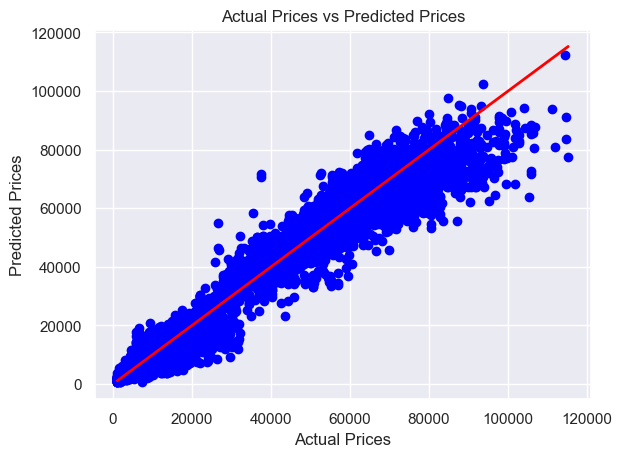

In [228]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


In [229]:
import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import pickle

with open('gpt-CatBoost.pkl', 'wb') as file:
    pickle.dump(model_catboost, file)
    
import json

accuracy = model_catboost.score(X_test, y_test)
average_model_error = metrics.mean_absolute_error(y_test, y_pred)
average_model_error_verbosed = metrics.mean_squared_error(y_test, y_pred)
average_magnitude_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                                  
metrics = {
    "accuracy": accuracy,
    "average_model_error": average_model_error,
    "average_model_error_verbosed": average_model_error_verbosed,
    "average_magnitude_error": average_magnitude_error
}

with open('metrics_gpt-CatBoost.json', 'w') as file:
    
    json.dump(metrics, file)
    
    

MAE: 1403.9350159704268
MSE: 6910917.740845669
RMSE: 2628.862442358989
